# What is Credit Risk?

A credit risk is risk of default on a debt that may arise from a borrower failing to make required payments. A loan is in default when the lending agency is certain that a loan will not be repaid (i.e. bills not paid in due time). 

Predicting default beforehand is useful to estimate expected loss where

    Expected Loss = Probability of Default (PD) * Exposure at Default (EAD) * Loss Given Default (LGD)
    
  Here, EAD = $ amount outstanding at time of default and LGD is ratio of exposure against any recovery from loss
  
  e.g. if, after default, the exposure amount is 100 and the debt is sold at 20, then LGD is 80%
  
Our focus here is to calculate PD given Application and Behavioral data of the lending agency's customers.

# Exploring the Data

In [1]:
#import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
cr_loan = pd.read_csv('https://assets.datacamp.com/production/repositories/4876/datasets/a2d8510b4aec8d0ac14ab9bee61ba3c085805967/cr_loan2.csv')

In [3]:
cr_loan.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length'],
      dtype='object')

In [4]:
cr_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
person_age                    32581 non-null int64
person_income                 32581 non-null int64
person_home_ownership         32581 non-null object
person_emp_length             31686 non-null float64
loan_intent                   32581 non-null object
loan_grade                    32581 non-null object
loan_amnt                     32581 non-null int64
loan_int_rate                 29465 non-null float64
loan_status                   32581 non-null int64
loan_percent_income           32581 non-null float64
cb_person_default_on_file     32581 non-null object
cb_person_cred_hist_length    32581 non-null int64
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [5]:
cr_loan.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In this data set, **loan_status** shows whether the loan is currently in default with 1 being default and 0 being non-default.

There are more columns within the data, and many could have a relationship with the values in **loan_status**. We need to explore the data and these relationships more with further analysis to understand the impact of the data on credit loan defaults.

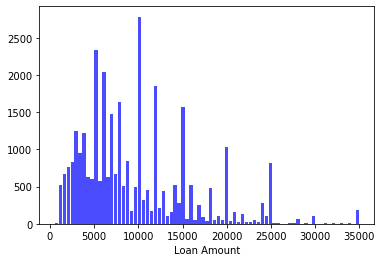

In [6]:
# Look at the distribution of loan amounts with a histogram
n, bins, patches = plt.hist(x=cr_loan['loan_amnt'], bins='auto', color='blue',alpha=0.7, rwidth=0.85)
plt.xlabel("Loan Amount")
plt.show()

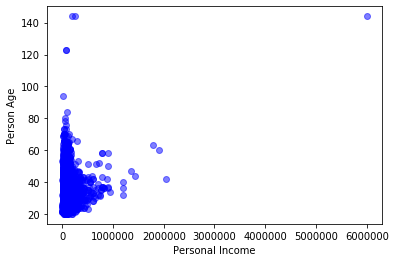

In [7]:
#exploring the relationship between income and age

# Plot a scatter plot of income against age
plt.scatter(cr_loan['person_income'], cr_loan['person_age'],c='blue', alpha=0.5)
plt.xlabel('Personal Income')
plt.ylabel('Person Age')
plt.show()

Let's calculate some crosstabular relationships to explore how loan_status is affected by factors like home ownership status, loan grade, and loan percentage of income.

In [8]:
pd.crosstab(cr_loan['loan_intent'], cr_loan['loan_status'], margins = True)

loan_status,0,1,All
loan_intent,,,
DEBTCONSOLIDATION,3722,1490,5212
EDUCATION,5342,1111,6453
HOMEIMPROVEMENT,2664,941,3605
MEDICAL,4450,1621,6071
PERSONAL,4423,1098,5521
VENTURE,4872,847,5719
All,25473,7108,32581


In [9]:
pd.crosstab(cr_loan['person_home_ownership'],[cr_loan['loan_status'],cr_loan['loan_grade']])

loan_status               0                                 1             \
loan_grade                A     B     C    D    E   F  G    A     B    C   
person_home_ownership                                                      
MORTGAGE               5219  3729  1934  658  178  36  0  239   324  321   
OTHER                    23    29    11    9    2   0  0    3     5    6   
OWN                     860   770   464  264   26   7  0   66    34   31   
RENT                   3602  4222  2710  554  137  28  1  765  1338  981   

loan_status                               
loan_grade                D    E   F   G  
person_home_ownership                     
MORTGAGE                553  161  61  31  
OTHER                    11    6   2   0  
OWN                      18   31   8   5  
RENT                   1559  423  99  27

In [10]:
pd.crosstab(cr_loan['person_home_ownership'], cr_loan['loan_status'],
              values=cr_loan['loan_percent_income'], aggfunc='mean')

loan_status,0,1
person_home_ownership,,
MORTGAGE,0.146504,0.184882
OTHER,0.143784,0.300000
OWN,0.180013,0.297358
RENT,0.144611,0.264859


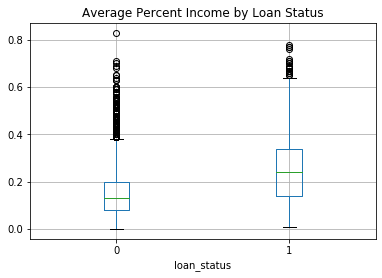

In [11]:
cr_loan.boxplot(column = ['loan_percent_income'], by = 'loan_status')
plt.title('Average Percent Income by Loan Status')
plt.suptitle('')
plt.show()

It looks like the average percentage of income for defaults is higher. This could indicate those recipients have a debt-to-income ratio that's already too high.

### Outlier Detection

We can build a crosstable of loan status and home ownership type and tabulate the maximum employment length of customer to find any outliers in employment length.

In [12]:
pd.crosstab(cr_loan['loan_status'],cr_loan['person_home_ownership'],
        values=cr_loan['person_emp_length'], aggfunc='max')

person_home_ownership,MORTGAGE,OTHER,OWN,RENT
loan_status,,,,
0,123.0,24.0,31.0,41.0
1,34.0,11.0,17.0,123.0


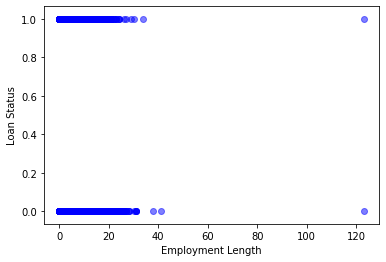

In [13]:
# Create the scatter plot for age and amount
plt.scatter(cr_loan['person_emp_length'], cr_loan['loan_status'], c='blue', alpha=0.5)
plt.xlabel("Employment Length")
plt.ylabel("Loan Status")
plt.show()

123 years is an unreal employment length value. Let's remove outliers with employment length > 60

In [14]:
# Create an array of indices where employment length is greater than 60
indices = cr_loan[cr_loan['person_emp_length'] > 60].index

# Dropping the records from the data based on the indices and create a new dataframe
cr_loan_new = cr_loan.drop(indices)

# Create the cross table from earlier and include minimum employment length
pd.crosstab(cr_loan_new['loan_status'],cr_loan_new['person_home_ownership'],
            values=cr_loan_new['person_emp_length'], aggfunc=['min','max'])

min                      max                  
person_home_ownership MORTGAGE OTHER  OWN RENT MORTGAGE OTHER   OWN  RENT
loan_status                                                              
0                          0.0   0.0  0.0  0.0     38.0  24.0  31.0  41.0
1                          0.0   0.0  0.0  0.0     34.0  11.0  17.0  27.0

This is more realistic now. Generally employment length is a key characteristic in any analysis of credit therefore it must be clean and without outliers. 

Same applies to the age column, so let's find outliers in age. 

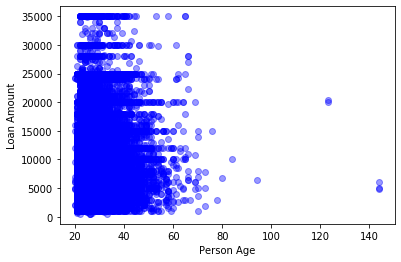

In [15]:
# Create the scatter plot for age and amount
plt.scatter(cr_loan_new['person_age'], cr_loan_new['loan_amnt'], c='blue', alpha=0.4)
plt.xlabel("Person Age")
plt.ylabel("Loan Amount")
plt.show()

In [16]:
cr_loan_new = cr_loan_new.drop(cr_loan_new[cr_loan_new['person_age'] > 100].index)

In [17]:
import matplotlib

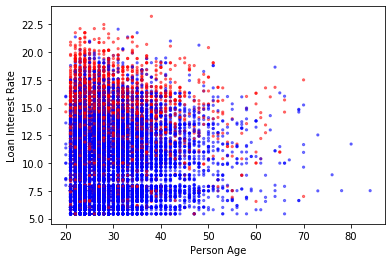

In [18]:
# Create a scatter plot of age and interest rate
fig, ax = plt.subplots()

colors = ["blue","red"]

ax.scatter(cr_loan_new['person_age'], cr_loan_new['loan_int_rate'],
            c = cr_loan_new['loan_status'], marker = 'o', s = 5,
            cmap = matplotlib.colors.ListedColormap(colors),
            alpha=0.5)

ax.set_xlabel("Person Age")
ax.set_ylabel("Loan Interest Rate")

plt.show()

### Imputing Missing Data

First, let's find which columns have null data. 

In [19]:
cr_loan_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32574 entries, 1 to 32580
Data columns (total 12 columns):
person_age                    32574 non-null int64
person_income                 32574 non-null int64
person_home_ownership         32574 non-null object
person_emp_length             31679 non-null float64
loan_intent                   32574 non-null object
loan_grade                    32574 non-null object
loan_amnt                     32574 non-null int64
loan_int_rate                 29459 non-null float64
loan_status                   32574 non-null int64
loan_percent_income           32574 non-null float64
cb_person_default_on_file     32574 non-null object
cb_person_cred_hist_length    32574 non-null int64
dtypes: float64(3), int64(5), object(4)
memory usage: 3.2+ MB


In [20]:
print(cr_loan_new.columns[cr_loan_new.isnull().any()])

Index(['person_emp_length', 'loan_int_rate'], dtype='object')


In [21]:
cr_loan_new[cr_loan_new['person_emp_length'].isnull()].head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
105,22,12600,MORTGAGE,NaN,PERSONAL,A,2000,5.42,1,0.16,N,4
222,24,185000,MORTGAGE,NaN,EDUCATION,B,35000,12.42,0,0.19,N,2
379,24,16800,MORTGAGE,NaN,DEBTCONSOLIDATION,A,3900,NaN,1,0.23,N,3
407,25,52000,RENT,NaN,PERSONAL,B,24000,10.74,1,0.46,N,2
408,22,17352,MORTGAGE,NaN,EDUCATION,C,2250,15.27,0,0.13,Y,3


Let's replace the nulls with median of employment lengths.

In [22]:
cr_loan_new['person_emp_length'].fillna((cr_loan_new['person_emp_length'].median()), inplace=True)

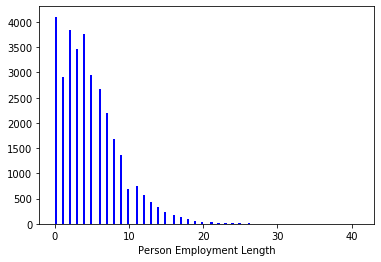

In [23]:
n, bins, patches = plt.hist(cr_loan_new['person_emp_length'], bins='auto', color='blue')
plt.xlabel("Person Employment Length")
plt.show()

Let's drop the records with missing data in the next column i.e. interest rates.

In [24]:
print(cr_loan_new['loan_int_rate'].isnull().sum())

3115


In [25]:
indices = cr_loan_new[cr_loan_new['loan_int_rate'].isnull()].index
cr_loan_clean = cr_loan_new.drop(indices)

In [26]:
cr_loan_clean['person_home_ownership'].value_counts()

RENT        14890
MORTGAGE    12119
OWN          2356
OTHER          94
Name: person_home_ownership, dtype: int64

# Logistic Regression for Probability of Default

We noticed that people with higher interest rates tend to have a higher probability of defaulting. Let's build a logit model with one predictor variable as input first. 

In [27]:
from sklearn.linear_model import LogisticRegression

# Create the X and y data sets
X = cr_loan_clean[['loan_int_rate']]
y = cr_loan_clean[['loan_status']]

# Create and fit a logistic regression model
clf_logistic_single = LogisticRegression()
clf_logistic_single.fit(X, np.ravel(y))

# Print the parameters of the model
print(clf_logistic_single.get_params())

# Print the intercept of the model
print(clf_logistic_single.intercept_)

{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'warn', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'warn', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
[-4.43672624]


/Users/chiragkamra/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Let's now build a multivariate logistic regression model, using interest rate and employment length.

In [28]:
# Create X data for the model
X_multi = cr_loan_clean[['loan_int_rate','person_emp_length']]

# Create a set of y data for training
y = cr_loan_clean[['loan_status']]

# Create and train a new logistic regression
clf_logistic_multi = LogisticRegression(solver='lbfgs').fit(X_multi, np.ravel(y))

# Print the intercept of the model
print(clf_logistic_multi.intercept_)

[-4.21645549]


We are calculating intercepts because the intercept is actually the log odds of non-default. i.e when there are no predictor variables and only beta0 in the function below:

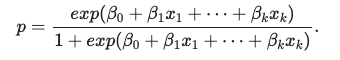

i.e.

logit(p)= β0


The new clf_logistic_multi model has an .intercept_ value closer to zero. This means the log odds of a non-default is approaching zero.

Let's now incorporate income into the model. and this time, split the data to test accuracy.

In [29]:
from sklearn.model_selection import train_test_split

# Create the X and y data sets
X = cr_loan_clean[['loan_int_rate','person_emp_length','person_income']]
y = cr_loan_clean[['loan_status']]

# Use test_train_split to create the training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=123)

# Create and fit the logistic regression model
clf_logistic = LogisticRegression(solver='lbfgs').fit(X_train, np.ravel(y_train))

# Print the models coefficients
print(clf_logistic.coef_)

[[ 1.28517496e-09 -2.27622202e-09 -2.17211991e-05]]


This can be interpreted as

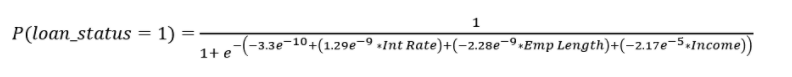

We need to incorporate text data to accomodate for string data as well as numeric in our best model. For this, we must one-hot encode.

In [30]:
# Create two data sets for numeric and non-numeric data
cred_num = cr_loan_clean.select_dtypes(exclude=['object'])
cred_str = cr_loan_clean.select_dtypes(include=['object'])

# One-hot encode the non-numeric columns
cred_str_onehot = pd.get_dummies(cred_str)

# Union the one-hot encoded columns to the numeric ones
cr_loan_prep = pd.concat([cred_num, cred_str_onehot], axis=1)

# Print the columns in the new data set
print(cr_loan_prep.columns)

Index(['person_age', 'person_income', 'person_emp_length', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_cred_hist_length', 'person_home_ownership_MORTGAGE',
       'person_home_ownership_OTHER', 'person_home_ownership_OWN',
       'person_home_ownership_RENT', 'loan_intent_DEBTCONSOLIDATION',
       'loan_intent_EDUCATION', 'loan_intent_HOMEIMPROVEMENT',
       'loan_intent_MEDICAL', 'loan_intent_PERSONAL', 'loan_intent_VENTURE',
       'loan_grade_A', 'loan_grade_B', 'loan_grade_C', 'loan_grade_D',
       'loan_grade_E', 'loan_grade_F', 'loan_grade_G',
       'cb_person_default_on_file_N', 'cb_person_default_on_file_Y'],
      dtype='object')


Below, we will build a logreg model and fit it to the test set. The output of probabilities always has 2 values, prob(y=0), prob(y=1). we are interested in the latter as that is the probablity of default. 

In [31]:
#Split the clean dataset again

X = cr_loan_prep.drop('loan_status', axis=1)
y = cr_loan_prep[['loan_status']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=123)

In [32]:
# Train the logistic regression model on the training data
clf_logistic = LogisticRegression(solver='lbfgs').fit(X_train, np.ravel(y_train))

# Create predictions of probability for loan status using test data
preds = clf_logistic.predict_proba(X_test)

# Create dataframes of first five predictions, and first five true labels
preds_df = pd.DataFrame(preds[:,1][0:5], columns = ['prob_default'])
true_df = y_test.head()

# Concatenate and print the two data frames for comparison
print(pd.concat([true_df.reset_index(drop = True), preds_df], axis = 1))

   loan_status  prob_default
0            1      0.445779
1            1      0.223447
2            0      0.288558
3            0      0.169358
4            1      0.114182


The predictions aren't that great. Let's check the accuracy of the model.

In [33]:
logreg_preds = pd.DataFrame(preds[:,1], columns = ['logreg_prob_default'])

### Model Evaluation

In [34]:
from sklearn.metrics import classification_report

# Create a dataframe for the probabilities of default
preds_df = pd.DataFrame(preds[:,1], columns = ['prob_default'])

# Reassign loan status based on the threshold
preds_df['loan_status'] = preds_df['prob_default'].apply(lambda x: 1 if x > 0.50 else 0)

# Print the row counts for each loan status
print(preds_df['loan_status'].value_counts())

# Print the classification report
target_names = ['Non-Default', 'Default']
print(classification_report(y_test, preds_df['loan_status'], target_names=target_names))

0    11175
1      609
Name: loan_status, dtype: int64
              precision    recall  f1-score   support

 Non-Default       0.81      0.98      0.89      9198
     Default       0.71      0.17      0.27      2586

    accuracy                           0.80     11784
   macro avg       0.76      0.57      0.58     11784
weighted avg       0.79      0.80      0.75     11784



It looks like almost all of our test set was predicted to be non-default. The recall for defaults is 0.17 meaning 17% of our true defaults were predicted correctly. This most certainly means our threshold value of 0.5 is not the best choice in this scenario.

In [35]:
from sklearn.metrics import precision_recall_fscore_support

In [36]:
print(precision_recall_fscore_support(y_test,preds_df['loan_status']))

(array([0.80742729, 0.71264368]), array([0.98097412, 0.16782676]), array([0.8857802 , 0.27167449]), array([9198, 2586]))


In [37]:
print(clf_logistic.score(X_test, y_test))

0.8025288526816021


### Visually scoring credit models

In [38]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

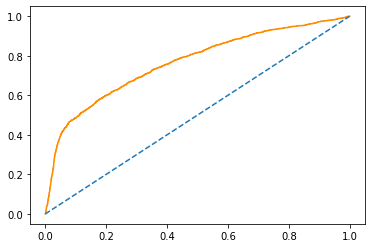

In [39]:
# Plot the ROC curve of the probabilities of default
prob_default = preds[:, 1]
fallout, sensitivity, thresholds = roc_curve(y_test, prob_default)
plt.plot(fallout, sensitivity, color = 'darkorange')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.show()

# Compute the AUC and store it in a variable
auc = roc_auc_score(y_test, prob_default)

In [40]:
print(auc)

0.7643248801355148


### What is the optimal threshold?

In [41]:
from sklearn.metrics import confusion_matrix

In [42]:
# Print the confusion matrix
print(confusion_matrix(y_test,preds_df['loan_status']))

[[9023  175]
 [2152  434]]


In [43]:
# Set the threshold for defaults to 0.4
preds_df['loan_status'] = preds_df['prob_default'].apply(lambda x: 1 if x > 0.4 else 0)

# Print the confusion matrix
print(confusion_matrix(y_test,preds_df['loan_status']))

[[8476  722]
 [1386 1200]]


Note that here 1200 is true positive and not 8476 (true negative). The axes here are a transpose of how wikipedia tabulates a CM. 

Calculating the impact of 0.4 threshold on the model performance.

In [44]:
avg_loan_amnt = np.mean(cr_loan_prep['loan_amnt'])

In [45]:
# Store the number of loan defaults from the prediction data
num_defaults = preds_df['loan_status'].value_counts()[1]

In [46]:
# Store the default recall from the classification report
default_recall = precision_recall_fscore_support(y_test,preds_df['loan_status'])[1][1]

# Calculate the estimated impact of the new default recall rate
print(num_defaults * avg_loan_amnt * (1 - default_recall))

9872265.223119883


The above calculation is essentially the loss incurred by defualts not caught. This is calculated as the proportion of defaults not caught, times the total number of defaults in test set (i.e. preds_df['loan_status']), times avg loan owed

plt.plot(thresh,def_recalls)
plt.plot(thresh,nondef_recalls)
plt.plot(thresh,accs)
plt.xlabel("Probability Threshold")
plt.xticks(ticks)
plt.legend(["Default Recall","Non-default Recall","Model Accuracy"])
plt.show()

The threshold of 0.275 is a good starting point, albeit impractical. 

# EXTREME GRADIENT BOOSTED MODEL

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=123)

In [48]:
# Train a model
import xgboost as xgb
clf_gbt = xgb.XGBClassifier().fit(X_train, np.ravel(y_train))

# Predict with a model
gbt_preds = clf_gbt.predict_proba(X_test)

# Create dataframes of first five predictions, and first five true labels
preds_df = pd.DataFrame(gbt_preds[:,1][0:5], columns = ['prob_default'])
true_df = y_test.head()

# Concatenate and print the two data frames for comparison
print(pd.concat([true_df.reset_index(drop = True), preds_df], axis = 1))

   loan_status  prob_default
0            1      0.990942
1            1      0.983987
2            0      0.000807
3            0      0.001239
4            1      0.084892


In [49]:
xgbt_preds = pd.DataFrame(gbt_preds[:,1], columns = ['xgbt_prob_default'])

We will now compare the predictions of logistic regression with the XgBoost predictions.

In [50]:
loan_amnt = pd.DataFrame(X_test['loan_amnt'])

In [51]:
loan_amnt

,loan_amnt
31622,15000
24935,11200
15342,15000
3460,10800
16424,3000
18405,7750
23914,10000
21913,15000
13825,15000
9768,9000


In [52]:
loan_status_amnt = pd.concat([y_test,loan_amnt], axis = 1)

In [53]:
portfolio = pd.concat([logreg_preds, xgbt_preds, loan_status_amnt.reset_index(drop = True)], axis = 1)

In [54]:
portfolio.head()

,logreg_prob_default,xgbt_prob_default,loan_status,loan_amnt
0,0.445779,0.990942,1,15000
1,0.223447,0.983987,1,11200
2,0.288558,0.000807,0,15000
3,0.169358,0.001239,0,10800
4,0.114182,0.084892,1,3000


Calculating Expected loss assuming lgd = 20%

In [55]:
portfolio['lgd'] = 0.2

In [56]:
portfolio.head()

,logreg_prob_default,xgbt_prob_default,loan_status,loan_amnt,lgd
0,0.445779,0.990942,1,15000,0.2
1,0.223447,0.983987,1,11200,0.2
2,0.288558,0.000807,0,15000,0.2
3,0.169358,0.001239,0,10800,0.2
4,0.114182,0.084892,1,3000,0.2


In [57]:
# Create expected loss columns for each model using the formula
portfolio['xgbt_expected_loss'] = portfolio['xgbt_prob_default'] * portfolio['lgd'] * portfolio['loan_amnt']
portfolio['logreg_expected_loss'] = portfolio['logreg_prob_default'] * portfolio['lgd'] * portfolio['loan_amnt']

# Print the sum of the expected loss for lr
print('LR expected loss: ', np.sum(portfolio['logreg_expected_loss']))

# Print the sum of the expected loss for gbt
print('GBT expected loss: ', np.sum(portfolio['xgbt_expected_loss']))

LR expected loss:  5596776.979852879
GBT expected loss:  5383982.807797434


XGBT is doing a little better. Let's now make predictions. (Remember .predict gives binary predictions and predict proba gives probabilities.

In [58]:
xgbt_predictions = clf_gbt.predict(X_test)

In [59]:
print(xgbt_predictions)

[1 1 0 ... 0 0 0]


In [60]:
target_names = ['Non-Default', 'Default']
print(classification_report(y_test, xgbt_predictions, target_names=target_names))

              precision    recall  f1-score   support

 Non-Default       0.93      0.99      0.96      9198
     Default       0.94      0.74      0.83      2586

    accuracy                           0.93     11784
   macro avg       0.94      0.86      0.89     11784
weighted avg       0.93      0.93      0.93     11784



This model seems to be doing much better in terms of recall. This has some serious potential. Let's try selecting appropriate columns now using .get_booster(), .get_score() and plot_importance methods.

In [61]:
X = cr_loan_prep[['person_income','loan_int_rate',
                  'loan_percent_income','loan_amnt',
                  'person_home_ownership_MORTGAGE','loan_grade_F']]

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=123)

In [63]:
clf_gbt = xgb.XGBClassifier().fit(X_train,np.ravel(y_train))

# Print the column importances from the model
print(clf_gbt.get_booster().get_score(importance_type = 'weight'))

{'loan_percent_income': 515, 'loan_int_rate': 1001, 'person_income': 1299, 'loan_amnt': 519, 'person_home_ownership_MORTGAGE': 116, 'loan_grade_F': 9}


So, the importance for loan_grade_F is only 9 in this case. This could be because there are so few of the F-grade loans. While the F-grade loans don't add much to predictions here, they might affect the importance of other training columns.

Let's now visualize column importance using just two or three columns

In [64]:
X2 = cr_loan_prep[['loan_int_rate','person_emp_length']]
X3 = cr_loan_prep[['person_income','loan_int_rate','loan_percent_income']]

In [65]:
X2_train, X2_test, X3_train, X3_test = train_test_split(X2, X3, test_size=.4, random_state=123)

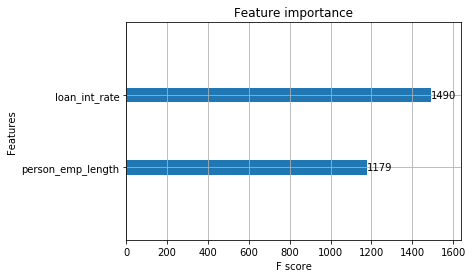

In [66]:
# Train a model on the X data with 2 columns
clf_gbt2 = xgb.XGBClassifier().fit(X2_train,np.ravel(y_train))

# Plot the column importance for this model
xgb.plot_importance(clf_gbt2, importance_type = 'weight')
plt.show()

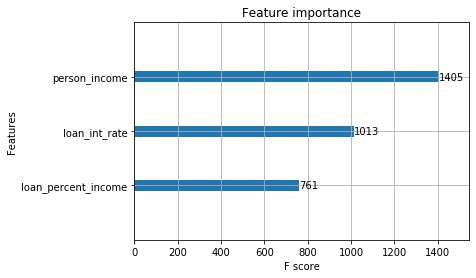

In [67]:
# Train a model on the X data with 3 columns
clf_gbt3 = xgb.XGBClassifier().fit(X3_train,np.ravel(y_train))

# Plot the column importance for this model
xgb.plot_importance(clf_gbt3, importance_type = 'weight')
plt.show()

In [68]:
# Predict the loan_status using each model
gbt_preds = clf_gbt.predict(X_test)
gbt2_preds = clf_gbt2.predict(X2_test)
gbt3_preds = clf_gbt3.predict(X3_test)

# Print the classification report of the first model
target_names = ['Non-Default', 'Default']
print(classification_report(y_test, gbt_preds, target_names=target_names))

# Print the classification report of the second model
print(classification_report(y_test, gbt2_preds, target_names=target_names))

# Print the classification report of the third model
print(classification_report(y_test, gbt3_preds, target_names=target_names))

              precision    recall  f1-score   support

 Non-Default       0.91      0.95      0.93      9198
     Default       0.81      0.66      0.73      2586

    accuracy                           0.89     11784
   macro avg       0.86      0.81      0.83     11784
weighted avg       0.89      0.89      0.89     11784

              precision    recall  f1-score   support

 Non-Default       0.83      0.96      0.89      9198
     Default       0.67      0.29      0.40      2586

    accuracy                           0.81     11784
   macro avg       0.75      0.62      0.65     11784
weighted avg       0.79      0.81      0.78     11784

              precision    recall  f1-score   support

 Non-Default       0.90      0.94      0.92      9198
     Default       0.74      0.65      0.69      2586

    accuracy                           0.87     11784
   macro avg       0.82      0.79      0.81     11784
weighted avg       0.87      0.87      0.87     11784



### Cross Validating Credit Models

Credit loans and their data change over time, and it won't always look like what's been loaded into the current test sets. So, you can use cross-validation to try several smaller training and test sets which are derived from the original X_train and y_train.

In [69]:
params = {'eval_metric': 'auc', 'objective': 'binary:logistic', 'seed': 123}

In [70]:
# Set the values for number of folds and stopping iterations
n_folds = 5
early_stopping = 10

# Create the DTrain matrix for XGBoost
DTrain = xgb.DMatrix(X_train, label = y_train)

# Create the data frame of cross validations
cv_df = xgb.cv(params, DTrain, num_boost_round = 5, nfold=n_folds,
            early_stopping_rounds=early_stopping)

# Print the cross validations data frame
print(cv_df)

   train-auc-mean  train-auc-std  test-auc-mean  test-auc-std
0        0.884537       0.001848       0.877218      0.005511
1        0.892087       0.002086       0.883282      0.007081
2        0.896208       0.002214       0.885650      0.006140
3        0.898414       0.002245       0.886062      0.006838
4        0.900582       0.002823       0.887498      0.006857


Remember to not use a really high number of folds as that can lead to an overfitted model. The AUC will never reach 1.

In [71]:
# Import the necessary modules
from sklearn.model_selection import cross_val_score

In [72]:
# Create a gradient boosted tree model using two hyperparameters
gbt = xgb.XGBClassifier(learning_rate = 0.1, max_depth = 7)

# Calculate the cross validation scores for 4 folds
cv_scores = cross_val_score(gbt, X_train, np.ravel(y_train), cv = 4)

# Print the cross validation scores
print(cv_scores)

# Print the average accuracy and standard deviation of the scores
print("Average accuracy: %0.2f (+/- %0.2f)" % (cv_scores.mean(),
                                              cv_scores.std() * 2))

[0.88914027 0.89069925 0.89112721 0.870756  ]
Average accuracy: 0.89 (+/- 0.02)


### Modelling after Undersampling

Let's first select all the columns in X and y again.

In [148]:
#Split the clean dataset again

X = cr_loan_prep.drop('loan_status', axis=1)
y = cr_loan_prep[['loan_status']]

In [149]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=123)

In [150]:
X_y_train = pd.concat([X_train.reset_index(drop = True),
                       y_train.reset_index(drop = True)], axis = 1)

count_nondefault, count_default = X_y_train['loan_status'].value_counts()

In [151]:
count_nondefault

13798

In [152]:
count_default

3877

In [153]:
# Create data sets for defaults and non-defaults
nondefaults = X_y_train[X_y_train['loan_status'] == 0]
defaults = X_y_train[X_y_train['loan_status'] == 1]

# Undersample the non-defaults
nondefaults_under = nondefaults.sample(count_default)

# Concatenate the undersampled nondefaults with defaults
X_y_train_under = pd.concat([nondefaults_under.reset_index(drop = True),
                             defaults.reset_index(drop = True)], axis = 0)

# Print the value counts for loan status
print(X_y_train_under['loan_status'].value_counts())

1    3877
0    3877
Name: loan_status, dtype: int64


In [154]:
X_train_under = X_y_train_under.drop('loan_status', axis =1)
y_train_under = X_y_train_under[['loan_status']]

In [155]:
clf_gbt_under = xgb.XGBClassifier().fit(X_train_under,np.ravel(y_train_under))

In [156]:
clf_gbt_under_preds = clf_gbt_under.predict(X_test)

In [157]:
gbt_proba = clf_gbt_under.predict_proba(X_test)

In [158]:
print(clf_gbt_under_preds)

[1 1 0 ... 0 1 0]


In [159]:
target_names = ['Non-Default', 'Default']
print(classification_report(y_test, clf_gbt_under_preds, target_names=target_names))

              precision    recall  f1-score   support

 Non-Default       0.95      0.91      0.93      9198
     Default       0.72      0.83      0.77      2586

    accuracy                           0.89     11784
   macro avg       0.83      0.87      0.85     11784
weighted avg       0.90      0.89      0.89     11784



In [160]:
print(confusion_matrix(y_test,clf_gbt_under_preds))

[[8357  841]
 [ 449 2137]]


In [161]:
print(roc_auc_score(y_test, clf_gbt_under_preds))

0.8674699281443712


False positives are higher but recall is higher which is good. We are more interested in how accurately a default is predicted rather than a non-default incorrectly predicted as default. Default not predicted results in a much greater loss than a non-default predicted as defualt. 

# Model Evaluation and Implementation

We will now evaluate our Xgboost model by first calculating the unweighted average of F1 scores for default and non default known as the macro average given y the formula belw. 

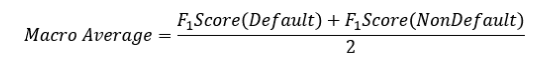

In [162]:
d = {'prob_default': gbt_proba[:,1], 'loan_status': clf_gbt_under_preds}

# Create a dataframe for the probabilities of default
preds_df_gbt = pd.DataFrame(data = d)

In [163]:
# Print the gradient boosted tree classification report
print(classification_report(y_test, preds_df_gbt['loan_status'], target_names=target_names))

              precision    recall  f1-score   support

 Non-Default       0.95      0.91      0.93      9198
     Default       0.72      0.83      0.77      2586

    accuracy                           0.89     11784
   macro avg       0.83      0.87      0.85     11784
weighted avg       0.90      0.89      0.89     11784



In [164]:
# Print the default F-1 scores for the gradient boosted tree
print(precision_recall_fscore_support(y_test,preds_df_gbt['loan_status'], average = 'macro')[2])

0.8482508320301376


### ROC AUC

In [165]:
fallout_gbt, sensitivity_gbt, thresholds_gbt = roc_curve(y_test, preds_df_gbt['prob_default'])

# in roc_curve() we put an array/series of probabilities not a multi column df

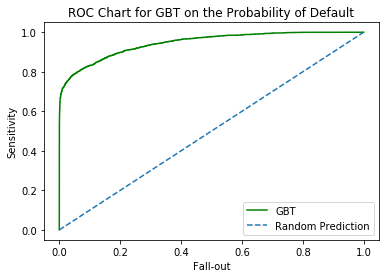

In [166]:
plt.plot(fallout_gbt, sensitivity_gbt, color = 'green', label='%s' % 'GBT')
plt.plot([0, 1], [0, 1], linestyle='--', label='%s' % 'Random Prediction')
plt.title("ROC Chart for GBT on the Probability of Default")
plt.xlabel('Fall-out')
plt.ylabel('Sensitivity')
plt.legend()
plt.show()

In [167]:
print("Gradient Boosted Tree AUC Score: %0.2f" % roc_auc_score(y_test, preds_df_gbt['prob_default']))

Gradient Boosted Tree AUC Score: 0.95


### Model Calibration

We want our probabilities of default to closely match the model's confidence intervals. This means that if we pick a sample of loans, the predicted probabilities of defaults in that sample should closely match the percentage of defaults in that sample. 

In [169]:
from sklearn.calibration import calibration_curve

curve = calibration_curve(y_test, gbt_proba[:,1], n_bins = 20)


In [170]:
curve

(array([0.00838692, 0.02847458, 0.05202914, 0.07375887, 0.0954955 ,
        0.11023622, 0.1260745 , 0.17363344, 0.19502075, 0.13944223,
        0.18181818, 0.20348837, 0.23870968, 0.2704918 , 0.35897436,
        0.328     , 0.48      , 0.47413793, 0.69480519, 0.98554913]),
 array([0.01424727, 0.07403612, 0.12365021, 0.17368004, 0.22404177,
        0.27425748, 0.32513607, 0.37473681, 0.42363651, 0.47486686,
        0.52415881, 0.5730529 , 0.62346002, 0.67591775, 0.72315618,
        0.77159679, 0.82535247, 0.87657826, 0.92643058, 0.99204042]))

In [171]:
frac_of_pos_gbt = curve[0]
mean_pred_val_gbt = curve[1]

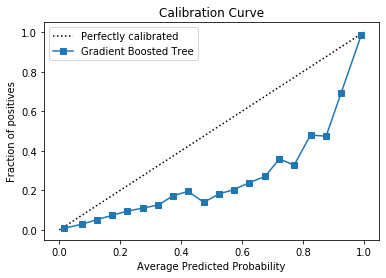

In [172]:
# Add the calibration curve for the gradient boosted tree
plt.plot([0, 1], [0, 1], 'k:', label='Perfectly calibrated')    
plt.plot(mean_pred_val_gbt, frac_of_pos_gbt,
         's-', label='%s' % 'Gradient Boosted Tree')
plt.ylabel('Fraction of positives')
plt.xlabel('Average Predicted Probability')
plt.legend()
plt.title('Calibration Curve')
plt.show()

### Deciding on a Threshold

Acceptance rates are perentage of loans requests approved in order to keep the number of defaults in a portfolio low. And Accepted loans that do default have are predicted to have a probability below a certain number. 

e.g if we want to accept 85% of all loans with lowest probabilities of default, then our acceptance rate is 85%.

We use the acceptance rate to calculate our thresholds.

In [173]:
 print(preds_df_gbt['prob_default'].describe())

count    11784.000000
mean         0.312409
std          0.355055
min          0.000003
25%          0.032574
50%          0.141813
75%          0.507964
max          0.999995
Name: prob_default, dtype: float64


Let's assume the acceptance rate set up by the lending agency is 0.85. 

In [214]:
threshold_85 = np.quantile(preds_df_gbt['prob_default'], 0.85)

In [215]:
print(threshold_85)

0.939702695608139


In [176]:
preds_df_gbt['pred_loan_status'] = preds_df_gbt['prob_default'].apply(lambda x: 1 if x > threshold_85 else 0)

In [178]:
print(preds_df_gbt['pred_loan_status'].value_counts())

0    10016
1     1768
Name: pred_loan_status, dtype: int64


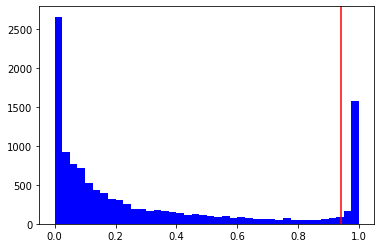

In [182]:
# Plot the predicted probabilities of default
plt.hist(preds_df_gbt['prob_default'], color = 'blue', bins = 40)

# Calculate the threshold with quantile
threshold = np.quantile(preds_df_gbt['prob_default'], 0.85)

# Add a reference line to the plot for the threshold
plt.axvline(x = threshold, color = 'red')
plt.show()

Bad rates are proportion of accepted loans that defaulted.

In [186]:
# Create a subset of only accepted loans
accepted_loans = preds_df_gbt[preds_df_gbt['pred_loan_status'] == 0]

# Calculate the bad rate
print(np.sum(accepted_loans['loan_status']) / accepted_loans['loan_status'].count())

0.12080670926517571


In [194]:
preds_df_gbt_amnt = pd.concat([preds_df_gbt, X_test['loan_amnt'].reset_index(drop = True)],axis =1)

In [196]:
# BAD RATE IMPACT
avg_loan = np.mean(preds_df_gbt_amnt['loan_amnt'])

pd.options.display.float_format = '${:,.2f}'.format
print(pd.crosstab(preds_df_gbt_amnt['loan_status'],
                 preds_df_gbt_amnt['pred_loan_status']).apply(lambda x: x * avg_loan, axis = 0))

pred_loan_status              0              1
loan_status                                   
0                $84,152,636.41          $0.00
1                $11,563,103.57 $16,895,510.01


With this, we can see that our bad rate of about 12% represents an estimated loan value of about 11.5 million dollars. This may seem like a lot at first, but compare it to the total value of non-default loans! With this, we are ready to start talking about our acceptance strategy going forward.

### CREDIT STRATEGY

We will now create a strategy table to analyze, estimated portfolio value at different acceptance rates and subsequent thresholds.

The estimated value is the difference between the average value of accepted non-defaults minus average value of accepted defaults. Remember, accepted defaults is represented in the bad rate as well. For calculation simplification, each default is assumed to have a default value of average loan amount of all loans. 

So the formula ends up being:

        [Number of accepted loans * (1 - bad rate) * avg loan amount] 
        (MINUS)        [Number of accepted loans * bad rate * avg loan amount]

In [225]:
accept_rates = [1.0, 0.95, 0.9, 0.85, 0.8, 0.75, 0.7, 0.65, 0.6, 0.55, 0.5, 0.45, 0.4, 0.35, 0.3, 0.25, 0.2, 0.15, 0.1,0.05]
thresholds = []
bad_rates = []
num_accepted_loans = []

In [226]:
for rate in accept_rates:
    # Calculate the threshold for the acceptance rate
    thresh = np.quantile(preds_df_gbt_amnt['prob_default'], rate).round(3)
    # Add the threshold value to the list of thresholds
    thresholds.append(np.quantile(preds_df_gbt_amnt['prob_default'], rate).round(3))
    # Reassign the loan_status value using the threshold
    preds_df_gbt_amnt['pred_loan_status'] = preds_df_gbt_amnt['prob_default'].apply(lambda x: 1 if x > thresh else 0)
    # Create a set of accepted loans using this acceptance rate
    accepted_loans = preds_df_gbt_amnt[preds_df_gbt_amnt['pred_loan_status'] == 0]
    # Calculate and append the bad rate using the acceptance rate
    bad_rates.append(np.sum((accepted_loans['loan_status']) / len(accepted_loans['loan_status'])).round(3))
    #Calculate and append number of loans accepted for given threshold
    num_accepted_loans.append(len(preds_df_gbt_amnt[preds_df_gbt_amnt['prob_default'] < thresh]))

In [209]:
pd.options.display.float_format = '{:,.3f}'.format

In [243]:
# Create a data frame of the strategy table
strat_df = pd.DataFrame(zip(accept_rates, thresholds, bad_rates, ),
                        columns = ['Acceptance Rate','Threshold','Bad Rate'])

# Print the entire table
print(strat_df)

    Acceptance Rate  Threshold  Bad Rate
0             1.000      1.000     0.253
1             0.950      0.998     0.209
2             0.900      0.993     0.171
3             0.850      0.940     0.121
4             0.800      0.693     0.066
5             0.750      0.508     0.004
6             0.700      0.389     0.000
7             0.650      0.301     0.000
8             0.600      0.230     0.000
9             0.550      0.181     0.000
10            0.500      0.142     0.000
11            0.450      0.112     0.000
12            0.400      0.087     0.000
13            0.350      0.067     0.000
14            0.300      0.049     0.000
15            0.250      0.033     0.000
16            0.200      0.018     0.000
17            0.150      0.007     0.000
18            0.100      0.002     0.000
19            0.050      0.001     0.000


/Users/chiragkamra/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  
/Users/chiragkamra/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys


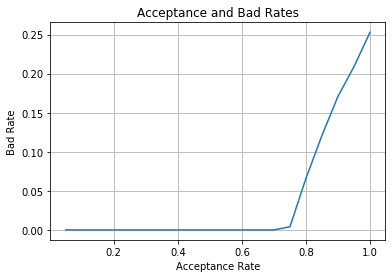

In [222]:
# Plot the strategy curve
plt.plot(strat_df['Acceptance Rate'], strat_df['Bad Rate'])
plt.xlabel('Acceptance Rate')
plt.ylabel('Bad Rate')
plt.title('Acceptance and Bad Rates')
plt.axes().yaxis.grid()
plt.axes().xaxis.grid()
plt.show()

In [237]:
num_loans_df = pd.DataFrame(num_accepted_loans, columns = ['num_accepted_loans'])

In [239]:
num_loans_df.head()

,num_accepted_loans
0,11784
1,11126
2,10622
3,10019
4,9425


In [247]:
strat_df = pd.concat([strat_df, num_loans_df], axis = 1)

In [250]:
strat_df['Avg_loan_amnt'] = np.mean(preds_df_gbt_amnt['loan_amnt'])

In [265]:
strat_df['Estimated_Value'] = (strat_df['num_accepted_loans'] * (1 - strat_df['Bad Rate']) * strat_df['Avg_loan_amnt']) - (strat_df['num_accepted_loans'] * strat_df['Bad Rate'] * strat_df['Avg_loan_amnt'])

In [268]:
strat_df

,Acceptance Rate,Threshold,Bad Rate,num_accepted_loans,Avg_loan_amnt,Estimated_Value
0,1.000,1.000,0.253,11784,"9,556.284","55,629,957.500"
1,0.950,0.998,0.209,11126,"9,556.284","61,880,111.226"
2,0.900,0.993,0.171,10622,"9,556.284","66,791,506.021"
3,0.850,0.940,0.121,10019,"9,556.284","72,574,261.899"
4,0.800,0.693,0.066,9425,"9,556.284","78,179,003.320"
5,0.750,0.508,0.004,8838,"9,556.284","83,782,770.000"
6,0.700,0.389,0.000,8246,"9,556.284","78,801,117.405"
7,0.650,0.301,0.000,7660,"9,556.284","73,201,135.014"
8,0.600,0.230,0.000,7075,"9,556.284","67,610,708.906"
9,0.550,0.181,0.000,6485,"9,556.284","61,972,501.379"


/Users/chiragkamra/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


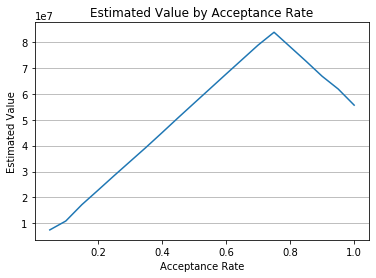

In [269]:
# Create a line plot of estimated value
plt.plot(strat_df['Acceptance Rate'],strat_df['Estimated_Value'])
plt.title('Estimated Value by Acceptance Rate')
plt.xlabel('Acceptance Rate')
plt.ylabel('Estimated Value')
plt.axes().yaxis.grid()
plt.show()

In [272]:
print(strat_df.loc[strat_df['Estimated_Value'] == np.max(strat_df['Estimated_Value'])])

   Acceptance Rate  Threshold  Bad Rate  num_accepted_loans  Avg_loan_amnt  \
5            0.750      0.508     0.004                8838      9,556.284   

   Estimated_Value  
5   83,782,770.000  


### Estimation of Expected Loss Based on 0.75 Acceptance Rate

In [274]:
test_preds_gbt = preds_df_gbt_amnt

In [286]:
test_preds_gbt['loss_given_default'] = 1

In [287]:
# Calculate the bank's expected loss and assign it to a new column
test_preds_gbt['expected_loss'] = test_preds_gbt['prob_default'] * test_preds_gbt['loan_amnt'] * test_preds_gbt['loss_given_default']

# Calculate the total expected loss to two decimal places
tot_exp_loss = round(np.sum(test_preds_gbt['expected_loss']),2)

# Print the total expected loss
print('Total expected loss: ', '${:,.2f}'.format(tot_exp_loss))

Total expected loss:  $37,372,400.36
